In [121]:
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [122]:
df = pd.read_csv(r'games.csv')

In [123]:
df.shape

(61326, 18)

In [124]:
#
new_df = df.iloc[:,1:].copy()

In [125]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61326 entries, 0 to 61325
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game            61326 non-null  object 
 1   Pos             61326 non-null  int64  
 2   Genre           61326 non-null  object 
 3   Console         61326 non-null  object 
 4   Publisher       61326 non-null  object 
 5   Developer       61300 non-null  object 
 6   VGChartz Score  1216 non-null   float64
 7   Critic Score    6554 non-null   float64
 8   User Score      391 non-null    float64
 9   Total Shipped   3842 non-null   object 
 10  Total Sales     18918 non-null  object 
 11  NA Sales        12639 non-null  object 
 12  PAL Sales       12824 non-null  object 
 13  Japan Sales     6794 non-null   object 
 14  Other_Sales     15163 non-null  object 
 15  Release_Date    56668 non-null  object 
 16  Last_Update     15078 non-null  object 
dtypes: float64(3), int64(1), object

In [126]:
#
new_df.dropna(subset=['Total Shipped','Total Sales'], inplace = True ,how='all')
new_df.dropna(subset=['Release_Date','Last_Update'], inplace = True ,how='all')
new_df.dropna(subset=['Developer'], inplace = True)
new_df.dropna(subset=['Game'], inplace = True)
new_df.dropna(subset=['Console'], inplace = True)

In [127]:
#
new_df['Total Shipped'] = new_df['Total Shipped'].fillna("")
new_df['Total Sales'] = new_df['Total Sales'].fillna("")
new_df['Total_Sales']= new_df['Total Shipped'] + new_df['Total Sales']
del new_df['Total Sales']
del new_df['Total Shipped']


In [128]:
new_df.duplicated(['Game','Console']).sum()

5160

In [129]:
#
new_df['sum_of_null'] = new_df.apply(lambda x: x.isna().sum(), axis=1)
new_df = new_df.sort_values(by=['sum_of_null']).drop_duplicates(['Game','Console'], keep='first').sort_index().reset_index(drop=True)

In [130]:
new_df.duplicated(['Game','Console']).sum()

0

In [131]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17510 entries, 0 to 17509
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game            17510 non-null  object 
 1   Pos             17510 non-null  int64  
 2   Genre           17510 non-null  object 
 3   Console         17510 non-null  object 
 4   Publisher       17510 non-null  object 
 5   Developer       17510 non-null  object 
 6   VGChartz Score  450 non-null    float64
 7   Critic Score    3705 non-null   float64
 8   User Score      231 non-null    float64
 9   NA Sales        9227 non-null   object 
 10  PAL Sales       9349 non-null   object 
 11  Japan Sales     4808 non-null   object 
 12  Other_Sales     11001 non-null  object 
 13  Release_Date    17057 non-null  object 
 14  Last_Update     5498 non-null   object 
 15  Total_Sales     17510 non-null  object 
 16  sum_of_null     17510 non-null  int64  
dtypes: float64(3), int64(2), object

In [132]:
#
new_df['VGChartz Score'] = new_df['VGChartz Score'].fillna(0)
new_df['Critic Score'] = new_df['Critic Score'].fillna(0)
new_df['User Score'] = new_df['User Score'].fillna(0)
new_df['NA Sales'] = new_df['NA Sales'].fillna(0)
new_df['PAL Sales'] = new_df['PAL Sales'].fillna(0)
new_df['Japan Sales'] = new_df['Japan Sales'].fillna(0)
new_df['Other_Sales'] = new_df['Other_Sales'].fillna(0)
new_df['Release_Date'] = new_df['Release_Date'].fillna(new_df['Last_Update'])
del new_df['Last_Update']


In [148]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17510 entries, 0 to 17509
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game            17510 non-null  object 
 1   Pos             17510 non-null  int64  
 2   Genre           17510 non-null  object 
 3   Console         17510 non-null  object 
 4   Publisher       17510 non-null  object 
 5   Developer       17510 non-null  object 
 6   VGChartz Score  17510 non-null  float64
 7   Critic Score    17510 non-null  float64
 8   User Score      17510 non-null  float64
 9   NA Sales        17510 non-null  int64  
 10  PAL Sales       17510 non-null  int64  
 11  Japan Sales     17510 non-null  int64  
 12  Other_Sales     17510 non-null  int64  
 13  Release_Date    17510 non-null  object 
 14  Total_Sales     17510 non-null  int64  
 15  sum_of_null     17510 non-null  int64  
 16  Hit_Games       17510 non-null  bool   
dtypes: bool(1), float64(3), int64(7

In [149]:
new_df.shape

(17510, 17)

In [147]:
new_df['Total_Sales']

0        51000000
1        47820000
2        25200000
3        21150000
4        20000000
           ...   
17505       30000
17506       30000
17507       40000
17508       30000
17509       10000
Name: Total_Sales, Length: 17510, dtype: int64

In [136]:
#change total sales to integer  for example "51.00m" -> 51,000,
def func(x):
    if (type(x) != str):
        return 0
    result = int(''.join(filter(str.isdigit, x))) * 10000
    return result
new_df['NA Sales'] = new_df.apply(lambda row: func(row['NA Sales']),axis=1)
new_df['PAL Sales'] = new_df.apply(lambda row: func(row['PAL Sales']),axis=1)
new_df['Japan Sales'] = new_df.apply(lambda row: func(row['Japan Sales']),axis=1)
new_df['Other_Sales'] = new_df.apply(lambda row: func(row['Other_Sales']),axis=1)
new_df['Total_Sales'] = new_df.apply(lambda row: func(row['Total_Sales']),axis=1)

In [138]:
#add column of Hit games and insert '1' for every game that have total_sales greater then 1m
new_df["Hit_Games"] = new_df["Total_Sales"] >= 1000000

In [140]:
new_df


,Game,Pos,Genre,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,NA Sales,PAL Sales,Japan Sales,Other_Sales,Release_Date,Total_Sales,sum_of_null,Hit_Games
0,God of War,1,Action,Series,Sony Computer Entertainment,SIE Santa Monica Studio,0.0,0.0,0.0,0,0,0,0,22nd Mar 05,51000000,7,True
1,Warriors,2,Action,Series,KOEI,Omega Force,0.0,0.0,0.0,0,0,0,0,30th Jun 97,47820000,7,True
2,Devil May Cry,3,Action,Series,Capcom,Capcom,0.0,0.0,0.0,0,0,0,0,16th Oct 01,25200000,7,True
3,Dynasty Warriors,4,Action,Series,KOEI,Omega Force,0.0,0.0,0.0,0,0,0,0,30th Jun 97,21150000,7,True
4,Frogger,5,Action,Series,Konami,Konami,0.0,0.0,0.0,0,0,0,0,23rd Oct 81,20000000,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17505,Wand of Fortune 2 FD: Kimi ni Sasageru Epilogue,461,Visual+Novel,PSP,Idea Factory,Idea Factory,0.0,0.0,0.0,0,0,30000,0,22nd Nov 12,30000,6,False
17506,Infinite Stratos 2: Ignition Hearts,462,Visual+Novel,PSV,5pb,5pb. Games,0.0,0.0,0.0,0,0,30000,0,27th Feb 14,30000,6,False
17507,Shin Hayarigami,463,Visual+Novel,PS3,Nippon Ichi Software,Nippon Ichi Software,0.0,0.0,0.0,0,0,40000,0,07th Aug 14,40000,6,False
17508,Root Letter,464,Visual+Novel,PS4,PQube,Kadokawa Games,0.0,0.0,0.0,0,0,30000,0,10th Nov 16,30000,6,False


In [141]:
#check if we have outliers in sales
new_df.describe(include = "all")

,Game,Pos,Genre,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,NA Sales,PAL Sales,Japan Sales,Other_Sales,Release_Date,Total_Sales,sum_of_null,Hit_Games
count,17510,17510.000000,17510,17510,17510,17510,17510.000000,17510.000000,17510.000000,1.751000e+04,1.751000e+04,1.751000e+04,1.751000e+04,17510,1.751000e+04,17510.000000,17510
unique,12914,NaN,18,47,1081,3304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4588,NaN,NaN,2
top,Minecraft,NaN,Action,PC,Ubisoft,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26th Oct 10,NaN,NaN,False
freq,11,NaN,3218,2610,833,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,NaN,14471
mean,NaN,2107.241748,NaN,NaN,NaN,NaN,0.194466,1.542479,0.111062,1.389406e+05,7.940206e+04,2.710109e+04,2.688921e+04,NaN,1.301541e+06,5.497658,NaN
std,NaN,1972.332540,NaN,NaN,NaN,NaN,1.218351,3.050528,0.973822,3.781142e+05,2.966896e+05,9.494074e+04,1.007367e+05,NaN,9.785694e+06,1.429266,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,NaN
25%,NaN,387.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,5.000000e+04,5.000000,NaN
50%,NaN,1562.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.700000e+05,5.000000,NaN
75%,NaN,3299.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.300000e+05,4.000000e+04,1.000000e+04,2.000000e+04,NaN,5.500000e+05,7.000000,NaN


1050000

In [157]:
new_df.to_csv("clean_data.csv")

In [ ]:
############################################################################################################

In [37]:
df.describe()

,Unnamed: 0,Pos
count,63739.000000,63739.000000
mean,31869.000000,2690.001867
std,18400.008741,2120.574102
min,0.000000,1.000000
25%,15934.500000,966.000000
50%,31869.000000,2247.000000
75%,47803.500000,3923.000000
max,63738.000000,9259.000000


<AxesSubplot:ylabel='Console'>

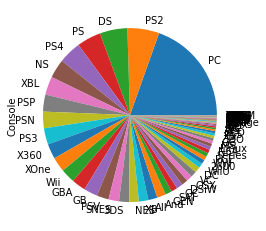

In [38]:
df["Console"].value_counts().plot(kind = 'pie')

<AxesSubplot:>

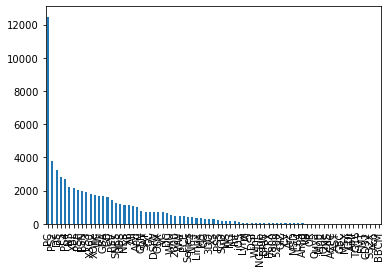

In [39]:
df["Console"].value_counts().plot(kind = 'bar')

In [40]:
df['Console'].value_counts(normalize = True)

PC      0.195579
PS2     0.059100
DS      0.051287
PS      0.044729
PS4     0.042141
          ...   
FMT     0.000047
CD32    0.000031
S32X    0.000016
Aco     0.000016
BBCM    0.000016
Name: Console, Length: 79, dtype: float64

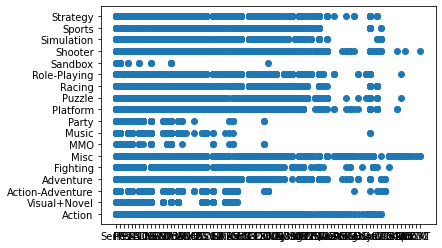

In [41]:
plt.scatter(df.Console, df.Genre)

In [60]:

df.loc[df['Game'] == ' Aokana: Four Rhythm Across the Blue     ']

,Unnamed: 0,Game,Pos,Genre,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other_Sales,Release_Date,Last_Update
1141,1141,Aokana: Four Rhythm Across the Blue,142,Visual+Novel,NS,Sprite,Sprite,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,21st Aug 20,11th May 20
1234,1234,Aokana: Four Rhythm Across the Blue,235,Visual+Novel,PC,Sprite,Sprite,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,27th Sep 19,11th May 20
1277,1277,Aokana: Four Rhythm Across the Blue,278,Visual+Novel,PS4,Sprite,Sprite,N/A,N/A,N/A,NaN,0.03m,NaN,NaN,0.03m,NaN,21st Aug 20,07th Apr 18
1288,1288,Aokana: Four Rhythm Across the Blue,289,Visual+Novel,NS,Sprite,Sprite,N/A,N/A,N/A,NaN,0.00m,NaN,NaN,0.00m,NaN,21st Aug 20,07th Apr 18
1330,1330,Aokana: Four Rhythm Across the Blue,331,Visual+Novel,PS4,Sprite,Sprite,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,21st Aug 20,11th May 20
1366,1366,Aokana: Four Rhythm Across the Blue,367,Visual+Novel,PSV,Sprite,Sprite,N/A,N/A,N/A,NaN,0.05m,NaN,NaN,0.05m,NaN,25th Feb 16,07th Apr 18
1512,1512,Aokana: Four Rhythm Across the Blue,42,Visual+Novel,PC,Sprite,Sprite,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,27th Sep 19,11th May 20
1555,1555,Aokana: Four Rhythm Across the Blue,85,Visual+Novel,PS4,Sprite,Sprite,N/A,N/A,N/A,NaN,0.03m,NaN,NaN,0.03m,NaN,21st Aug 20,07th Apr 18
1563,1563,Aokana: Four Rhythm Across the Blue,93,Visual+Novel,NS,Sprite,Sprite,N/A,N/A,N/A,NaN,0.00m,NaN,NaN,0.00m,NaN,21st Aug 20,07th Apr 18
1610,1610,Aokana: Four Rhythm Across the Blue,140,Visual+Novel,PS4,Sprite,Sprite,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,21st Aug 20,11th May 20


In [57]:
df['Game'].value_counts()

 Aokana: Four Rhythm Across the Blue         30
 Doki Doki Literature Club Plus!             26
 Chaos;Child                                 22
 Hatoful Boyfriend                           19
 Clannad                                     19
                                             ..
 myPostcards                                  1
 Victory Zone 2                               1
 Winky the Little Bear                        1
 Tilt!                                        1
 Supreme Commander                            1
Name: Game, Length: 32846, dtype: int64

In [67]:
for row in df.iterrows()
    print(row)

SyntaxError: invalid syntax (Temp/ipykernel_10860/3023157353.py, line 1)

In [74]:
new_df.shape

(63739, 17)

,Game,Pos,Genre,Console,Publisher,Developer,VGChartz Score,Critic Score,User Score,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other_Sales,Release_Date,Last_Update
0,God of War,1,Action,Series,Sony Computer Entertainment,SIE Santa Monica Studio,N/A,N/A,N/A,51.00m,NaN,NaN,NaN,NaN,NaN,22nd Mar 05,04th Mar 20
1,Warriors,2,Action,Series,KOEI,Omega Force,N/A,N/A,N/A,47.82m,NaN,NaN,NaN,NaN,NaN,30th Jun 97,24th Mar 20
2,Devil May Cry,3,Action,Series,Capcom,Capcom,N/A,N/A,N/A,25.20m,NaN,NaN,NaN,NaN,NaN,16th Oct 01,03rd Feb 20
3,Dynasty Warriors,4,Action,Series,KOEI,Omega Force,N/A,N/A,N/A,21.15m,NaN,NaN,NaN,NaN,NaN,30th Jun 97,24th Mar 20
4,Frogger,5,Action,Series,Konami,Konami,N/A,N/A,N/A,20.00m,NaN,NaN,NaN,NaN,NaN,23rd Oct 81,26th Feb 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63734,London Detective Mysteria Read the review,467,Visual+Novel,PSV,Xseed Games,Karin Entertainment,7.0,N/A,N/A,NaN,0.01m,NaN,NaN,0.01m,NaN,18th Dec 18,27th Dec 18
63735,Floral Flowlove,468,Visual+Novel,PC,Entergram,Entergram,N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,23rd Aug 18,26th Sep 18
63736,Hello Lady! Superior Dynamis,469,Visual+Novel,PSV,Dramatic Create,Dramatic Create,N/A,N/A,N/A,NaN,0.00m,NaN,NaN,0.00m,NaN,25th Jan 18,02nd Mar 18
63737,Sweet Pool,470,Visual+Novel,PSV,Dramatic Create,Dramatic Create,N/A,N/A,N/A,NaN,0.01m,NaN,NaN,0.01m,NaN,31st May 18,24th Jun 18


In [79]:
new_df.shape

(4308, 17)